# This file contains the code for the Random Forest training process

## Imports

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Data Processing

### Read data from file

In [2]:
df = pd.read_csv('data/train.csv')

### Check data columns

In [3]:
df.columns

Index(['ID', 'flow_duration', 'Header_Length', 'Protocol type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'Label'],
      dtype='object')

In [4]:
len(df.columns)

48

In [5]:
df.shape

(1950138, 48)

## Add binary class for dataset

In [6]:
df['Binary Class'] = df['Label'].apply(lambda x: 'attack' if x != 'BenignTraffic' else 'benign')

In [7]:
df.columns

Index(['ID', 'flow_duration', 'Header_Length', 'Protocol type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'Label',
       'Binary Class'],
      dtype='object')

## Save data to file that contains binary class

In [8]:
df.to_csv('data/train_binary.csv', index=False)

## Read data from file that contains binary class

In [9]:
df = pd.read_csv('data/train_binary.csv')

## Check data columns

In [10]:
df.columns

Index(['ID', 'flow_duration', 'Header_Length', 'Protocol type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'Label',
       'Binary Class'],
      dtype='object')

In [11]:
len(df.columns)

49

In [12]:
df.shape

(1950138, 49)

## Delete Label column

In [13]:
df = df.drop(columns=['Label'])

In [14]:
df.columns

Index(['ID', 'flow_duration', 'Header_Length', 'Protocol type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight',
       'Binary Class'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Binary Class'] = encoder.fit_transform(df['Binary Class'])

In [16]:
df['Binary Class'].value_counts()

Binary Class
0    1866053
1      84085
Name: count, dtype: int64

In [17]:
df['Binary Class'].unique()

array([0, 1])

## Get train data and output labels

In [18]:
X = df.drop(columns=['Binary Class'])
y = df['Binary Class']

## Feature scaling

In [19]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X = scaler.fit_transform(X)

## Split data into training and testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Random Forest model

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42, verbose=3)
model.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:  1.3min


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73

RandomForestClassifier(random_state=42, verbose=3)

## Make predictions

In [22]:
y_pred = model.predict(X_test)

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.7s


## Calculate accuracy

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.985929215338386


## Calculate confusion matrix

In [24]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[371799   1479]
 [  4009  12741]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    373278
           1       0.90      0.76      0.82     16750

    accuracy                           0.99    390028
   macro avg       0.94      0.88      0.91    390028
weighted avg       0.99      0.99      0.99    390028



## Feature importance 

In [26]:
importances = model.feature_importances_

In [27]:
X_df = pd.DataFrame(X, columns=df.columns.drop('Binary Class'))

In [28]:
X_df.columns

Index(['ID', 'flow_duration', 'Header_Length', 'Protocol type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight'],
      dtype='object')

In [29]:
feature_importances = pd.DataFrame({
    'Feature': X_df.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

            Feature    Importance
40              IAT  2.063869e-01
19        rst_count  1.039900e-01
18        urg_count  8.858247e-02
1     flow_duration  8.354871e-02
2     Header_Length  5.558795e-02
6             Srate  4.739290e-02
5              Rate  4.197120e-02
4          Duration  3.592744e-02
36              Max  2.377451e-02
39         Tot size  2.207933e-02
21            HTTPS  2.200678e-02
38              Std  2.186414e-02
43           Radius  2.102335e-02
44       Covariance  2.026679e-02
34          Tot sum  2.016926e-02
16        syn_count  1.925967e-02
37              AVG  1.904674e-02
42         Magnitue  1.819237e-02
35              Min  1.717046e-02
0                ID  1.694443e-02
41           Number  1.545465e-02
45         Variance  1.446272e-02
46           Weight  1.444484e-02
3     Protocol type  1.364877e-02
15        ack_count  9.343876e-03
12  ack_flag_number  8.668234e-03
17        fin_count  6.598679e-03
20             HTTP  5.231905e-03
11  psh_flag_n

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

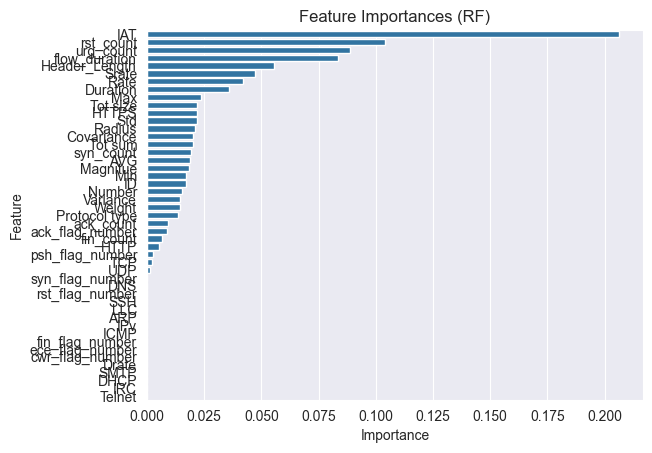

In [31]:
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances (RF)')
plt.show()

### Top 10 features

In [32]:
feature_importances.head(10)

,Feature,Importance
40,IAT,0.206387
19,rst_count,0.103990
18,urg_count,0.088582
1,flow_duration,0.083549
2,Header_Length,0.055588
6,Srate,0.047393
5,Rate,0.041971
4,Duration,0.035927
36,Max,0.023775
39,Tot size,0.022079


### Top 20 features

In [33]:
feature_importances.head(20)

,Feature,Importance
40,IAT,0.206387
19,rst_count,0.103990
18,urg_count,0.088582
1,flow_duration,0.083549
2,Header_Length,0.055588
6,Srate,0.047393
5,Rate,0.041971
4,Duration,0.035927
36,Max,0.023775
39,Tot size,0.022079


### Top 30 features

In [34]:
feature_importances.head(30)

,Feature,Importance
40,IAT,0.206387
19,rst_count,0.103990
18,urg_count,0.088582
1,flow_duration,0.083549
2,Header_Length,0.055588
6,Srate,0.047393
5,Rate,0.041971
4,Duration,0.035927
36,Max,0.023775
39,Tot size,0.022079


## Save model

In [35]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /Users/zed/Documents/MasterEDU/MayHocTrongATTT/mlis


In [ ]:
from pathlib import Path
import pickle

output_dir = Path('./models')
output_dir.mkdir(exist_ok=True)

scaler_baseline = scaler

with open('models/robust_scaler.pkl', 'wb') as f:
    pickle.dump(scaler_baseline, f)

In [37]:
from joblib import dump

dump(model, 'models/random_forest.joblib')

['models/random_forest.joblib']